In [19]:
import pandas as pd
import numpy as np

In [35]:
book = "book(1).csv"

In [36]:
book_data = pd.read_csv(book)

UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc3 in position 26: invalid continuation byte

In [37]:
import chardet
with open(book, 'rb') as rawdata:
    result = chardet.detect(rawdata.read(100000))
result

{'encoding': 'ISO-8859-1', 'confidence': 0.7171222254531355, 'language': ''}

In [38]:
book_data = pd.read_csv(book,encoding='ISO-8859-1')
book_data

,Unnamed: 0,User.ID,Book.Title,Book.Rating
0,1,276726,Classical Mythology,5
1,2,276729,Clara Callan,3
2,3,276729,Decision in Normandy,6
3,4,276736,Flu: The Story of the Great Influenza Pandemic...,8
4,5,276737,The Mummies of Urumchi,6
...,...,...,...,...
9995,9996,162121,American Fried: Adventures of a Happy Eater.,7
9996,9997,162121,Cannibal In Manhattan,9
9997,9998,162121,How to Flirt: A Practical Guide,7
9998,9999,162121,Twilight,8


In [39]:
book_data[:5]

,Unnamed: 0,User.ID,Book.Title,Book.Rating
0,1,276726,Classical Mythology,5
1,2,276729,Clara Callan,3
2,3,276729,Decision in Normandy,6
3,4,276736,Flu: The Story of the Great Influenza Pandemic...,8
4,5,276737,The Mummies of Urumchi,6


In [40]:
book_data.rename(columns={'User.ID':'userid'},inplace=True)
book_data.rename(columns={'Book.Title':'booktitle','Book.Rating':'rating'},inplace=True)
book_data

,Unnamed: 0,userid,booktitle,rating
0,1,276726,Classical Mythology,5
1,2,276729,Clara Callan,3
2,3,276729,Decision in Normandy,6
3,4,276736,Flu: The Story of the Great Influenza Pandemic...,8
4,5,276737,The Mummies of Urumchi,6
...,...,...,...,...
9995,9996,162121,American Fried: Adventures of a Happy Eater.,7
9996,9997,162121,Cannibal In Manhattan,9
9997,9998,162121,How to Flirt: A Practical Guide,7
9998,9999,162121,Twilight,8


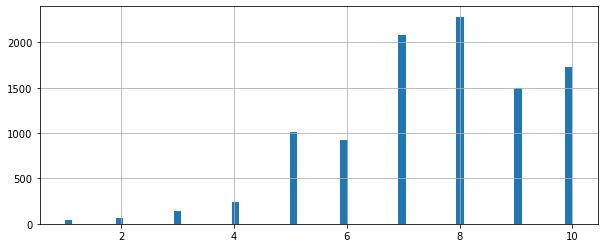

In [42]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,4))
book_data['rating'].hist(bins=70)

In [44]:
len(book_data.userid.unique())

2182

In [45]:
data = book_data.drop_duplicates()

In [46]:
len(book_data.rating.unique())

10

In [47]:
user_book_dt = book_data.pivot_table(index='userid',
                                 columns='booktitle',
                                 values='rating').reset_index(drop=True)


In [48]:
user_book_dt.head()

booktitle,"Jason, Madison &amp",Other Stories;Merril;1985;McClelland &amp,Repairing PC Drives &amp,'48,'O Au No Keia: Voices from Hawai'I's Mahu and Transgender Communities,...AND THE HORSE HE RODE IN ON : THE PEOPLE V. KENNETH STARR,01-01-00: A Novel of the Millennium,"1,401 More Things That P*Ss Me Off",10 Commandments Of Dating,"100 Great Fantasy Short, Short Stories",...,Zora Hurston and the Chinaberry Tree (Reading Rainbow Book),\Even Monkeys Fall from Trees\ and Other Japanese Proverbs,\I Won't Learn from You\: And Other Thoughts on Creative Maladjustment,"\More More More,\ Said the Baby",\O\ Is for Outlaw,"\Surely You're Joking, Mr. Feynman!\: Adventures of a Curious Character","\Well, there's your problem\: Cartoons",iI Paradiso Degli Orchi,stardust,Ã?Â?bermorgen.
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [49]:
#Impute those NaNs with 0 values
user_book_dt.fillna(0, inplace=True)
user_book_dt

booktitle,"Jason, Madison &amp",Other Stories;Merril;1985;McClelland &amp,Repairing PC Drives &amp,'48,'O Au No Keia: Voices from Hawai'I's Mahu and Transgender Communities,...AND THE HORSE HE RODE IN ON : THE PEOPLE V. KENNETH STARR,01-01-00: A Novel of the Millennium,"1,401 More Things That P*Ss Me Off",10 Commandments Of Dating,"100 Great Fantasy Short, Short Stories",...,Zora Hurston and the Chinaberry Tree (Reading Rainbow Book),\Even Monkeys Fall from Trees\ and Other Japanese Proverbs,\I Won't Learn from You\: And Other Thoughts on Creative Maladjustment,"\More More More,\ Said the Baby",\O\ Is for Outlaw,"\Surely You're Joking, Mr. Feynman!\: Adventures of a Curious Character","\Well, there's your problem\: Cartoons",iI Paradiso Degli Orchi,stardust,Ã?Â?bermorgen.
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2177,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2178,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2179,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,0.0,0.0
2180,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [50]:
C = data['rating'].mean()
print(C)

7.5663


In [51]:
# Calculate the minimum number of votes required to be in the chart, m
m = data['rating'].quantile(0.90)
print(m)

10.0


In [52]:
# Filter out all qualified Books into a new DataFrame
q_Books = data.copy().loc[data['rating'] >= m]
q_Books.shape

(1732, 4)

In [53]:
#Calculating Cosine Similarity between Users
from sklearn.metrics import pairwise_distances
from scipy.spatial.distance import cosine, correlation

In [54]:
user_sim = 1 - pairwise_distances( user_book_dt.values,metric='cosine')
user_sim.shape

(2182, 2182)

In [55]:
user_sim[1]

array([0., 1., 0., ..., 0., 0., 0.])

In [56]:
#Store the results in a dataframe
user_sim = pd.DataFrame(user_sim)
user_sim.index = book_data.userid.unique()
user_sim.columns = book_data.userid.unique()

In [57]:
user_sim.iloc[0:10, 0:10]

,276726,276729,276736,276737,276744,276745,276747,276748,276751,276754
276726,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
276729,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
276736,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
276737,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
276744,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
276745,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
276747,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
276748,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
276751,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
276754,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [58]:
user_sim.idxmax(axis=1)[0:125]

276726    276726
276729    276729
276736    276736
276737    276737
276744    276744
           ...  
277139    277139
277143    277143
277157    277157
277159    277159
277165    277165
Length: 125, dtype: int64

In [59]:
indices = pd.Series(book_data.index, index=book_data['booktitle']).drop_duplicates()

In [60]:
indices[:10]

booktitle
Classical Mythology                                                                                   0
Clara Callan                                                                                          1
Decision in Normandy                                                                                  2
Flu: The Story of the Great Influenza Pandemic of 1918 and the Search for the Virus That Caused It    3
The Mummies of Urumchi                                                                                4
The Kitchen God's Wife                                                                                5
What If?: The World's Foremost Military Historians Imagine What Might Have Been                       6
PLEADING GUILTY                                                                                       7
Under the Black Flag: The Romance and the Reality of Life Among the Pirates                           8
Where You'll Find Me: And Other Stories               

In [61]:
# Function that takes in book title as input and outputs most similar books
def get_recommendations(booktitle, cosine_sim=user_sim):
    # Get the index of the books that matches the title
    idx = indices[booktitle]

    # Get the pairwsie similarity scores of all books with that books
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Sort the books based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the scores of the 10 most similar books
    sim_scores = sim_scores[0:11]

    # Get the book indices
    books_indices = [i[0] for i in sim_scores]

    # Return the top 10 most similar books
    return book_data['booktitle'].iloc[books_indices]

## Recomending books based on book titles

In [62]:
get_recommendations('Under the Black Flag: The Romance and the Reality of Life Among the Pirates')

625                       My Garden (Beginning Literacy)
0                                    Classical Mythology
1                                           Clara Callan
2                                   Decision in Normandy
3      Flu: The Story of the Great Influenza Pandemic...
4                                 The Mummies of Urumchi
5                                 The Kitchen God's Wife
6      What If?: The World's Foremost Military Histor...
7                                        PLEADING GUILTY
8      Under the Black Flag: The Romance and the Real...
9                Where You'll Find Me: And Other Stories
Name: booktitle, dtype: object

In [63]:
get_recommendations("Where You'll Find Me: And Other Stories")

626                                       101 Dalmatians
0                                    Classical Mythology
1                                           Clara Callan
2                                   Decision in Normandy
3      Flu: The Story of the Great Influenza Pandemic...
4                                 The Mummies of Urumchi
5                                 The Kitchen God's Wife
6      What If?: The World's Foremost Military Histor...
7                                        PLEADING GUILTY
8      Under the Black Flag: The Romance and the Real...
9                Where You'll Find Me: And Other Stories
Name: booktitle, dtype: object